# Flu Shot Learning: Predicting H1N1 and Seasonal Flu Vaccines

## Importing requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Encoding
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#Feature Engineering
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

#Visualisations
from pandas_profiling import ProfileReport
import missingno as mno

#Models
from sklearn.multioutput import MultiOutputClassifier
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.adapt import MLkNN
import xgboost as xgb
from sklearn.multioutput import ClassifierChain
from sklearn.feature_selection import SelectPercentile, mutual_info_classif

#Parameter Search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Metrics
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


c:\Users\Daniel Abreu\anaconda3\envs\COMP4030\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Loading data

In [2]:
#Loading the dataset containing trainining features
features = pd.read_csv("training_set_features.csv", index_col="respondent_id")

#Loading the dataset containing the labels
labels = pd.read_csv("training_set_labels.csv", index_col="respondent_id")

## Exploration

In [3]:
#Returning the first five rows of the features dataframe for inspection
features.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   

               doctor_recc_h1n1  ...             income_poverty  \
respondent_id                    ...                              
0                           0.0  ...              Below Poverty   
1                           0.0  ...              Below Poverty   
2                           NaN  ...  <= $75,000, Above Poverty   
3                           0.0  ...              Below Poverty   
4                           0.0  ...  <= $75,000, Above Poverty   

               marital_status  rent_or_own   employment_status  \
respondent_id                                                    
0                 Not Married          Own  Not in Labor Force   
1                 Not Married         Rent            Employed   
2                 Not Married          Own            Employed   
3                 Not Married         Rent  Not in Labor Force   
4                     Married          Own            Employed   

               hhs_geo_region                census_msa  household_adults  \
respondent_id                                                               
0                    oxchjgsf                   Non-MSA               0.0   
1                    bhuqouqj  MSA, Not Principle  City               0.0   
2                    qufhixun  MSA, Not Principle  City               2.0   
3                    lrircsnp       MSA, Principle City               0.0   
4                    qufhixun  MSA, Not Principle  City               1.0   

               household_children  employment_industry  employment_occupation  
respondent_id                                                                  
0                             0.0                  NaN                    NaN  
1                             0.0             pxcmvdjn               xgwztkwe  
2                             0.0             rucpziij               xtkaffoo  
3                             0.0                  NaN                    NaN  
4                             0.0             wxleyezf               emcorrxb  

[5 rows x 35 columns]

In [4]:
#Returning the first five rows of the labels dataframe for inspection
labels.head()

h1n1_vaccine  seasonal_vaccine
respondent_id                                
0                         0                 0
1                         0                 1
2                         0                 0
3                         0                 1
4                         0                 0

In [5]:
#Returning the data type of each column in the features dataframe
features.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [6]:
#Printing a summary of the features dataframe
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

The dataset used consists of 26,707 responses and 35 features

We can see the data types available for this dataset are 25 instances of floats, 1 integer and 12 objects.

In [7]:
#Generating a statistical summary of the numerical columns in the features dataframe
features.describe().transpose()

count      mean       std  min  25%  50%  75%  \
h1n1_concern                 26615.0  1.618486  0.910311  0.0  1.0  2.0  2.0   
h1n1_knowledge               26591.0  1.262532  0.618149  0.0  1.0  1.0  2.0   
behavioral_antiviral_meds    26636.0  0.048844  0.215545  0.0  0.0  0.0  0.0   
behavioral_avoidance         26499.0  0.725612  0.446214  0.0  0.0  1.0  1.0   
behavioral_face_mask         26688.0  0.068982  0.253429  0.0  0.0  0.0  0.0   
behavioral_wash_hands        26665.0  0.825614  0.379448  0.0  1.0  1.0  1.0   
behavioral_large_gatherings  26620.0  0.358640  0.479610  0.0  0.0  0.0  1.0   
behavioral_outside_home      26625.0  0.337315  0.472802  0.0  0.0  0.0  1.0   
behavioral_touch_face        26579.0  0.677264  0.467531  0.0  0.0  1.0  1.0   
doctor_recc_h1n1             24547.0  0.220312  0.414466  0.0  0.0  0.0  0.0   
doctor_recc_seasonal         24547.0  0.329735  0.470126  0.0  0.0  0.0  1.0   
chronic_med_condition        25736.0  0.283261  0.450591  0.0  0.0  0.0  1.0   
child_under_6_months         25887.0  0.082590  0.275266  0.0  0.0  0.0  0.0   
health_worker                25903.0  0.111918  0.315271  0.0  0.0  0.0  0.0   
health_insurance             14433.0  0.879720  0.325300  0.0  1.0  1.0  1.0   
opinion_h1n1_vacc_effective  26316.0  3.850623  1.007436  1.0  3.0  4.0  5.0   
opinion_h1n1_risk            26319.0  2.342566  1.285539  1.0  1.0  2.0  4.0   
opinion_h1n1_sick_from_vacc  26312.0  2.357670  1.362766  1.0  1.0  2.0  4.0   
opinion_seas_vacc_effective  26245.0  4.025986  1.086565  1.0  4.0  4.0  5.0   
opinion_seas_risk            26193.0  2.719162  1.385055  1.0  2.0  2.0  4.0   
opinion_seas_sick_from_vacc  26170.0  2.118112  1.332950  1.0  1.0  2.0  4.0   
household_adults             26458.0  0.886499  0.753422  0.0  0.0  1.0  1.0   
household_children           26458.0  0.534583  0.928173  0.0  0.0  0.0  1.0   

                             max  
h1n1_concern                 3.0  
h1n1_knowledge               2.0  
behavioral_antiviral_meds    1.0  
behavioral_avoidance         1.0  
behavioral_face_mask         1.0  
behavioral_wash_hands        1.0  
behavioral_large_gatherings  1.0  
behavioral_outside_home      1.0  
behavioral_touch_face        1.0  
doctor_recc_h1n1             1.0  
doctor_recc_seasonal         1.0  
chronic_med_condition        1.0  
child_under_6_months         1.0  
health_worker                1.0  
health_insurance             1.0  
opinion_h1n1_vacc_effective  5.0  
opinion_h1n1_risk            5.0  
opinion_h1n1_sick_from_vacc  5.0  
opinion_seas_vacc_effective  5.0  
opinion_seas_risk            5.0  
opinion_seas_sick_from_vacc  5.0  
household_adults             3.0  
household_children           3.0

In [8]:
#We concatenate both features and labels into a dataframe called data_profile
data_profile = pd.concat([features, labels])

In [9]:
#We generate a profilling report for the concatenated dataframe
#The report will include information such as correlations, summaries and visualizations
profile = ProfileReport(data_profile, title="H1N1 and Seasonal Flu Vaccines")
#profile

Profile is currently commented as we only required it to be run once and it takes quite some time, however, the function was useful for quickly understanding the characteristics of the dataset and has been used as a starting point for further exploratory data analysis.

## Pre-Processing

### Checking Duplicates

In [10]:
#Checking for duplicates
features.duplicated().sum()

0

There are no duplicates in this dataset

### Checking Missing Data

In [11]:
#Creating a visual representation of the missing values in the features dataframe
mno.matrix(features, figsize = (25, 5))

<AxesSubplot: >

A matrix plot has been created, the plot shows missing values as white spaces so the larger the white spaces, the more missing values are present in a given column. 

In this case, we can see that health_insurance, employment_industry and employment_occupation are heavily dispersed with white spaces, indicating the huge number of null values in comparison to other columns. 

We can statistically calculate the percentage below.

In [12]:
#We calculate the percentage of missing values in each column of the features dataframe
missing_data = features.isnull().sum()/len(features)*100

#We sort the series into descending order based on the percentages
missing_data.sort_values(ascending=False)

employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
opinion_h1n1_sick_from_vacc     1.479013
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
household_children              0.932340
household_adults                0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
h1n1_knowledge                  0.434343
h1n1_concern    

We can see that the following features have over 40% of missing data so we can drop them:
- employment_occupation
- employment_industry
- health_insurance

In [13]:
features.drop(["health_insurance", "employment_industry", "employment_occupation"], axis = 1, inplace = True)
features.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   

               doctor_recc_h1n1  ...   race     sex  \
respondent_id                    ...                  
0                           0.0  ...  White  Female   
1                           0.0  ...  White    Male   
2                           NaN  ...  White    Male   
3                           0.0  ...  White  Female   
4                           0.0  ...  White  Female   

                          income_poverty  marital_status  rent_or_own  \
respondent_id                                                           
0                          Below Poverty     Not Married          Own   
1                          Below Poverty     Not Married         Rent   
2              <= $75,000, Above Poverty     Not Married          Own   
3                          Below Poverty     Not Married         Rent   
4              <= $75,000, Above Poverty         Married          Own   

                employment_status  hhs_geo_region                census_msa  \
respondent_id                                                                 
0              Not in Labor Force        oxchjgsf                   Non-MSA   
1                        Employed        bhuqouqj  MSA, Not Principle  City   
2                        Employed        qufhixun  MSA, Not Principle  City   
3              Not in Labor Force        lrircsnp       MSA, Principle City   
4                        Employed        qufhixun  MSA, Not Principle  City   

               household_adults  household_children  
respondent_id                                        
0                           0.0                 0.0  
1                           0.0                 0.0  
2                           2.0                 0.0  
3                           0.0                 0.0  
4                           1.0                 0.0  

[5 rows x 32 columns]

### Imputation of the missing data

In [177]:
#
features.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty                  object
marital_status           

In [178]:
#Assigning the numerical data to a variable
numeric = features.select_dtypes(exclude="object").columns

In [179]:

##Imputation of the Numerical Data using median
for column in numeric:
    features[column].fillna(features[column].median(), inplace= True)

In [49]:
#In order to use the KNN imputer, the data should be normalised to avoid biased replacements
#This is due to the KNN imputation being distance-based
scaler = MinMaxScaler()
numeric_data = pd.DataFrame(scaler.fit_transform(numeric), columns = numeric.columns)
numeric_data.head()

ValueError: could not convert string to float: 'h1n1_concern'

In [324]:
##Imputation of the Numerical Data using KNN
knn_imputer = KNNImputer(n_neighbors=5)

for column in numeric:
    features[column];knn_imputer.fit_transform(numeric_data)

In [180]:
features.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   

               doctor_recc_h1n1  ...   race     sex  \
respondent_id                    ...                  
0                           0.0  ...  White  Female   
1                           0.0  ...  White    Male   
2                           0.0  ...  White    Male   
3                           0.0  ...  White  Female   
4                           0.0  ...  White  Female   

                          income_poverty  marital_status  rent_or_own  \
respondent_id                                                           
0                          Below Poverty     Not Married          Own   
1                          Below Poverty     Not Married         Rent   
2              <= $75,000, Above Poverty     Not Married          Own   
3                          Below Poverty     Not Married         Rent   
4              <= $75,000, Above Poverty         Married          Own   

                employment_status  hhs_geo_region                census_msa  \
respondent_id                                                                 
0              Not in Labor Force        oxchjgsf                   Non-MSA   
1                        Employed        bhuqouqj  MSA, Not Principle  City   
2                        Employed        qufhixun  MSA, Not Principle  City   
3              Not in Labor Force        lrircsnp       MSA, Principle City   
4                        Employed        qufhixun  MSA, Not Principle  City   

               household_adults  household_children  
respondent_id                                        
0                           0.0                 0.0  
1                           0.0                 0.0  
2                           2.0                 0.0  
3                           0.0                 0.0  
4                           1.0                 0.0  

[5 rows x 32 columns]

In [181]:
missing_data = features.isnull().sum()/len(features)*100
missing_data.sort_values(ascending=False)

income_poverty                 16.561201
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
h1n1_concern                    0.000000
h1n1_knowledge                  0.000000
household_adults                0.000000
census_msa                      0.000000
hhs_geo_region                  0.000000
sex                             0.000000
race                            0.000000
age_group                       0.000000
opinion_seas_sick_from_vacc     0.000000
opinion_seas_risk               0.000000
opinion_seas_vacc_effective     0.000000
opinion_h1n1_sick_from_vacc     0.000000
opinion_h1n1_risk               0.000000
opinion_h1n1_vacc_effective     0.000000
health_worker                   0.000000
child_under_6_months            0.000000
chronic_med_condition           0.000000
doctor_recc_seasonal            0.000000
doctor_recc_h1n1                0.000000
behavioral_touch

We've now replaced the numerical data missing data with the means of the K-nearest Neighbor values

#### Encoding

In [182]:
#Assigning nominal data to a list
nominals = [col for col in features.columns if features[col].nunique() == 2] + [
        'race', 'employment_status', 'hhs_geo_region', 'census_msa']

#Assigning ordinal data to a list
ordinals = [col for col in features.columns if col not in nominals]

In [185]:
print(ordinals)

['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'income_poverty', 'household_adults', 'household_children']


In [187]:
col_transformer = make_column_transformer(
    (OneHotEncoder(), nominals),
    (make_pipeline(OrdinalEncoder(), StandardScaler(), SimpleImputer(strategy='most_frequent', add_indicator=True)), ordinals))
col_transformer

ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(),
                                 ['behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral_touch_face', 'doctor_recc_h1n1',
                                  'doctor_recc_seasonal',
                                  'chronic_med_condition',
                                  'child_under_6_months', 'health_worker',
                                  '...
                                                 ('simpleimputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='most_frequent'))]),
                                 ['h1n1_concern', 'h1n1_knowledge',
                                  'opinion_h1n1_vacc_effective',
                                  'opinion_h1n1_risk',
                                  'opinion_h1n1_sick_from_vacc',
                                  'opinion_seas_vacc_effective',
                                  'opinion_seas_risk',
                                  'opinion_seas_sick_from_vacc', 'age_group',
                                  'education', 'income_poverty',
                                  'household_adults', 'household_children'])])

In [188]:
features.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   

               doctor_recc_h1n1  ...   race     sex  \
respondent_id                    ...                  
0                           0.0  ...  White  Female   
1                           0.0  ...  White    Male   
2                           0.0  ...  White    Male   
3                           0.0  ...  White  Female   
4                           0.0  ...  White  Female   

                          income_poverty  marital_status  rent_or_own  \
respondent_id                                                           
0                          Below Poverty     Not Married          Own   
1                          Below Poverty     Not Married         Rent   
2              <= $75,000, Above Poverty     Not Married          Own   
3                          Below Poverty     Not Married         Rent   
4              <= $75,000, Above Poverty         Married          Own   

                employment_status  hhs_geo_region                census_msa  \
respondent_id                                                                 
0              Not in Labor Force        oxchjgsf                   Non-MSA   
1                        Employed        bhuqouqj  MSA, Not Principle  City   
2                        Employed        qufhixun  MSA, Not Principle  City   
3              Not in Labor Force        lrircsnp       MSA, Principle City   
4                        Employed        qufhixun  MSA, Not Principle  City   

               household_adults  household_children  
respondent_id                                        
0                           0.0                 0.0  
1                           0.0                 0.0  
2                           2.0                 0.0  
3                           0.0                 0.0  
4                           1.0                 0.0  

[5 rows x 32 columns]

In [189]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.3, random_state=123)

## Visualization

### Checking if the dataset is balanced

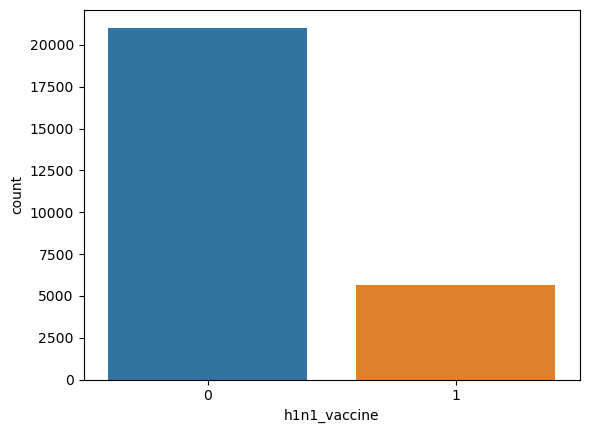

In [190]:
sns.countplot(x="h1n1_vaccine", data=labels);

In [19]:
sns.countplot(x="seasonal_vaccine", data=labels);

We can note that most people were not worried about the risk of H1N1

### Distribution Graphs

In [131]:
combined_df = features.join(labels)
combined_df.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   

               doctor_recc_h1n1  ...             income_poverty  \
respondent_id                    ...                              
0                           0.0  ...              Below Poverty   
1                           0.0  ...              Below Poverty   
2                           0.0  ...  <= $75,000, Above Poverty   
3                           0.0  ...              Below Poverty   
4                           0.0  ...  <= $75,000, Above Poverty   

               marital_status  rent_or_own   employment_status  \
respondent_id                                                    
0                 Not Married          Own  Not in Labor Force   
1                 Not Married         Rent            Employed   
2                 Not Married          Own            Employed   
3                 Not Married         Rent  Not in Labor Force   
4                     Married          Own            Employed   

               hhs_geo_region                census_msa  household_adults  \
respondent_id                                                               
0                    oxchjgsf                   Non-MSA               0.0   
1                    bhuqouqj  MSA, Not Principle  City               0.0   
2                    qufhixun  MSA, Not Principle  City               2.0   
3                    lrircsnp       MSA, Principle City               0.0   
4                    qufhixun  MSA, Not Principle  City               1.0   

               household_children  h1n1_vaccine  seasonal_vaccine  
respondent_id                                                      
0                             0.0             0                 0  
1                             0.0             0                 1  
2                             0.0             0                 0  
3                             0.0             0                 1  
4                             0.0             0                 0  

[5 rows x 34 columns]

In [134]:
"""
The function bellow is a visualisation technique gathered from the driven data article
regarding the same dataset @https://drivendata.co/blog/predict-flu-vaccine-data-benchmark/
"""
def vaccination_rate_plot(col, target, combined_df, ax=None):
    counts = (combined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

In [135]:
"""
The function bellow is a visualisation technique gathered from the driven data article
regarding the same dataset @https://drivendata.co/blog/predict-flu-vaccine-data-benchmark/
"""
columns_to_plot = ["behavioral_antiviral_meds",
                    "behavioral_avoidance",
                    "behavioral_face_mask",
                    "behavioral_wash_hands",
                    "behavioral_large_gatherings",
                    "behavioral_outside_home",
                    "behavioral_touch_face"]       

fig, ax = plt.subplots(
    len(columns_to_plot), 2, figsize=(9,len(columns_to_plot)*2.5)
)
for idx, col in enumerate(columns_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', combined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', combined_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

In [159]:
slices_to_plot = np.array(features[["behavioral_antiviral_meds",
                    "behavioral_avoidance",
                    "behavioral_face_mask",
                    "behavioral_wash_hands",
                    "behavioral_large_gatherings",
                    "behavioral_outside_home",
                    "behavioral_touch_face"]].sum())

In [160]:
behavioral_slices = ["Takes Antiviral Meds", "Avoided close contact", "Wears Face Mask", "Washes hands", "Attends Large Gatherings", "Goes outside", "Touches Face"]

plt.pie(slices_to_plot, labels = behavioral_slices)
plt.show()

### Visualising outliers

In [462]:
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

<AxesSubplot: >

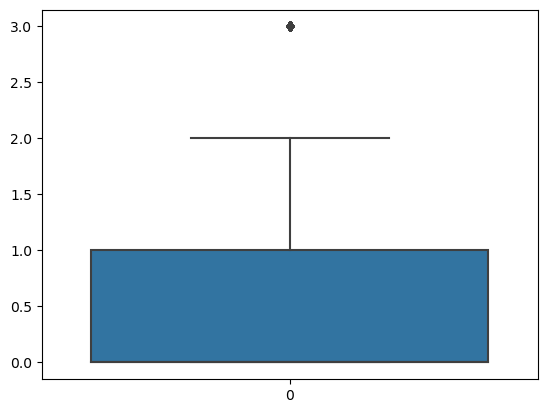

In [21]:
sns.boxplot(features.household_children)

<AxesSubplot: >

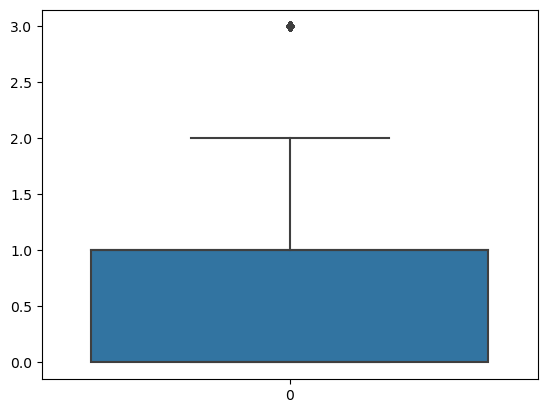

In [22]:
sns.boxplot(features.household_adults)

### Correlation

In [28]:
#Correlation of features to H1N1
features.corrwith(labels.h1n1_vaccine)

C:\Users\danie\AppData\Local\Temp\ipykernel_25804\1831096868.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  features.corrwith(labels.h1n1_vaccine)


h1n1_concern                   0.121929
h1n1_knowledge                 0.117951
behavioral_antiviral_meds      0.040608
behavioral_avoidance           0.047690
behavioral_face_mask           0.070498
behavioral_wash_hands          0.074712
behavioral_large_gatherings    0.017822
behavioral_outside_home        0.021768
behavioral_touch_face          0.071648
doctor_recc_h1n1               0.393890
doctor_recc_seasonal           0.209864
chronic_med_condition          0.095207
child_under_6_months           0.066962
health_worker                  0.169768
opinion_h1n1_vacc_effective    0.269347
opinion_h1n1_risk              0.323265
opinion_h1n1_sick_from_vacc    0.075091
opinion_seas_vacc_effective    0.179272
opinion_seas_risk              0.258571
opinion_seas_sick_from_vacc    0.008360
household_adults               0.007545
household_children            -0.003320
dtype: float64

In [29]:
features.corrwith(labels.seasonal_vaccine)

C:\Users\danie\AppData\Local\Temp\ipykernel_25804\3206147413.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  features.corrwith(labels.seasonal_vaccine)


h1n1_concern                   0.154828
h1n1_knowledge                 0.120152
behavioral_antiviral_meds      0.006277
behavioral_avoidance           0.076395
behavioral_face_mask           0.050083
behavioral_wash_hands          0.112414
behavioral_large_gatherings    0.064025
behavioral_outside_home        0.053509
behavioral_touch_face          0.120228
doctor_recc_h1n1               0.198607
doctor_recc_seasonal           0.369190
chronic_med_condition          0.170174
child_under_6_months           0.012097
health_worker                  0.127311
opinion_h1n1_vacc_effective    0.205072
opinion_h1n1_risk              0.216625
opinion_h1n1_sick_from_vacc    0.027404
opinion_seas_vacc_effective    0.361875
opinion_seas_risk              0.390106
opinion_seas_sick_from_vacc   -0.061510
household_adults              -0.064840
household_children            -0.114614
dtype: float64

C:\Users\danie\AppData\Local\Temp\ipykernel_25804\1245044536.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = features.corr()


<AxesSubplot: >

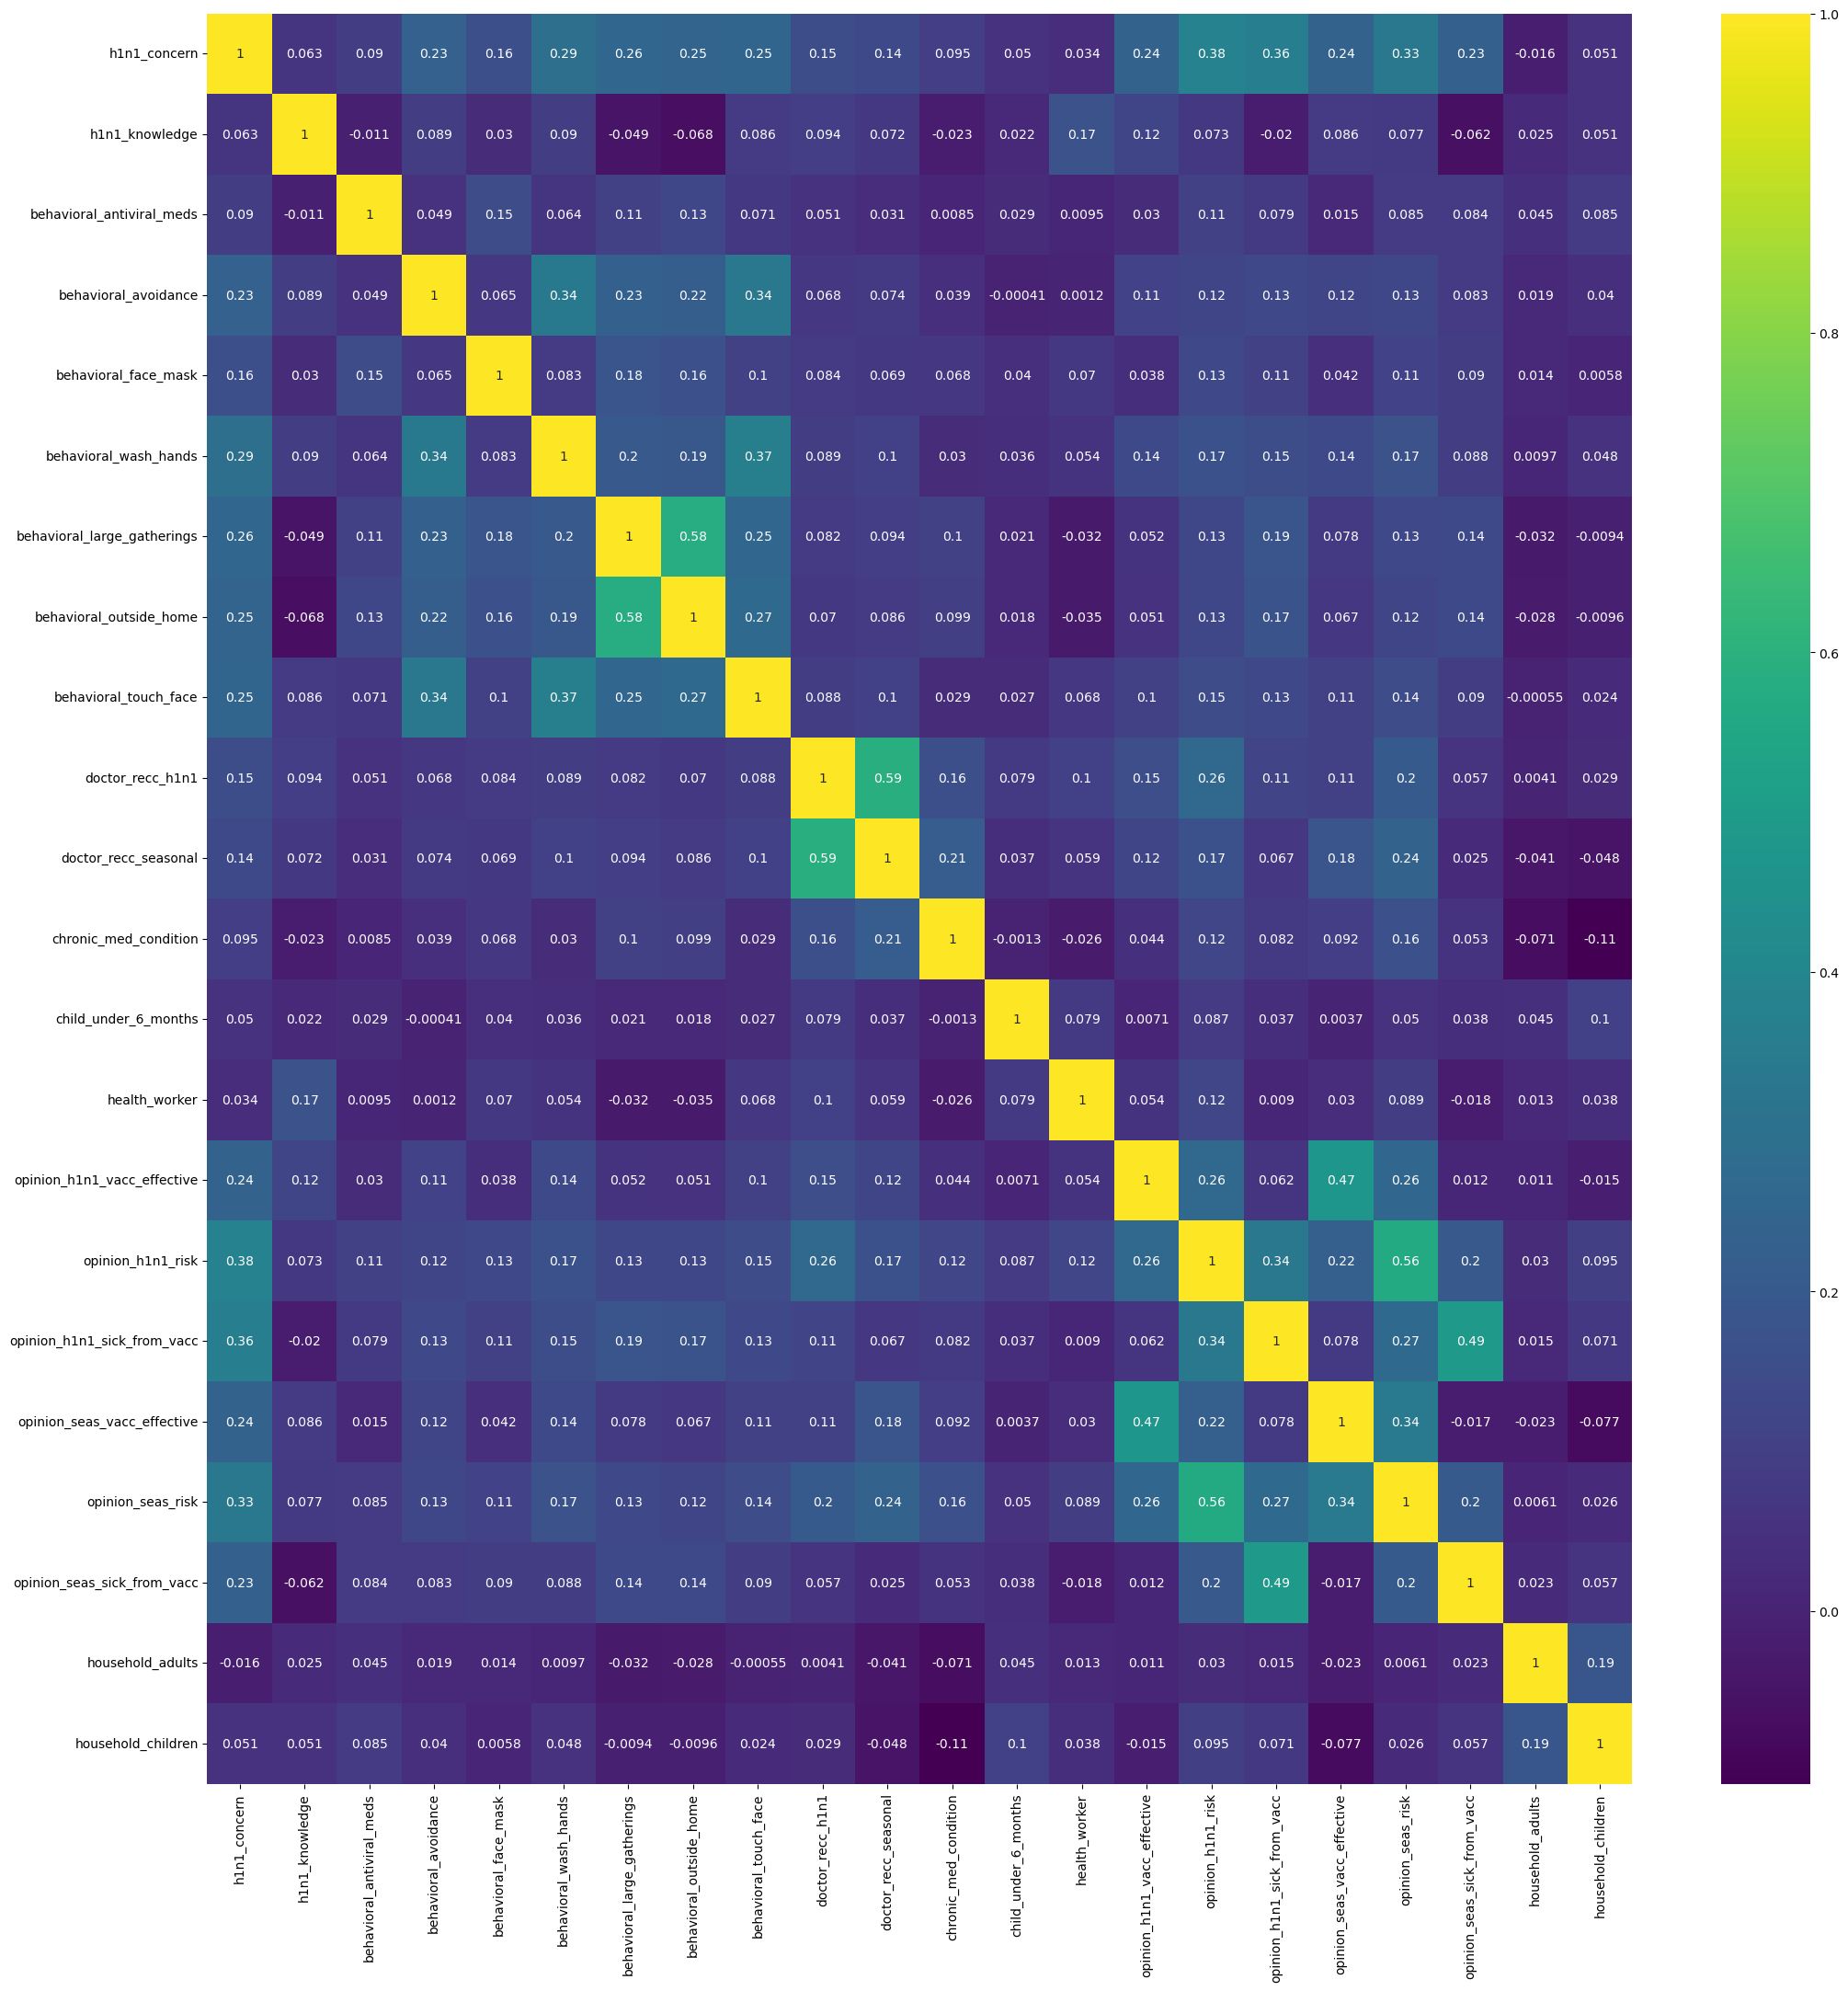

In [38]:
#We use the combined dataframe to visualise the correlation between the features using a heatmap
corrmat = features.corr()
correlation_features = corrmat.index
plt.figure(figsize=(25,25))

sns.heatmap(features[correlation_features].corr(), annot=True, cmap="viridis")

## Cross Tabulation

We will analyse which features may assist in the prediction of vaccination decision. 
We will begin by evaluating all the behavioural related variables below: 

- behavioral_antiviral_meds      
- behavioral_avoidance           
- behavioral_face_mask           
- behavioral_wash_hands          
- behavioral_large_gatherings    
- behavioral_outside_home        
- behavioral_touch_face

The data is binary.

In [118]:
def crosstab(x, y):

    return pd.crosstab(x, y, normalize='columns')*100

In [119]:
crosstab(labels['h1n1_vaccine'], features['behavioral_antiviral_meds'])


behavioral_antiviral_meds        0.0        1.0
h1n1_vaccine                                   
0                          79.126978  71.483474
1                          20.873022  28.516526

In [120]:
crosstab(labels['seasonal_vaccine'], features['behavioral_antiviral_meds'])

behavioral_antiviral_meds        0.0        1.0
seasonal_vaccine                               
0                          53.507046  52.113759
1                          46.492954  47.886241

In [25]:
crosstab(labels['h1n1_vaccine'], features['behavioral_avoidance'])

behavioral_avoidance        0.0        1.0
h1n1_vaccine                              
0                     81.886948  77.511962
1                     18.113052  22.488038

In [121]:
crosstab(labels['seasonal_vaccine'], features['behavioral_avoidance'])

behavioral_avoidance        0.0        1.0
seasonal_vaccine                          
0                     59.647916  51.116485
1                     40.352084  48.883515

In [100]:
crosstab(labels['h1n1_vaccine'], features['behavioral_face_mask'])

behavioral_face_mask        0.0        1.0
h1n1_vaccine                              
0                     79.538325  68.169473
1                     20.461675  31.830527

In [122]:
crosstab(labels['seasonal_vaccine'], features['behavioral_face_mask'])

behavioral_face_mask        0.0        1.0
seasonal_vaccine                          
0                     54.118073  44.269419
1                     45.881927  55.730581

In [27]:
crosstab(labels['h1n1_vaccine'], features['behavioral_wash_hands'])

behavioral_wash_hands        0.0        1.0
h1n1_vaccine                               
0                      85.397849  77.342721
1                      14.602151  22.657279

In [123]:
crosstab(labels['seasonal_vaccine'], features['behavioral_wash_hands'])

behavioral_wash_hands        0.0        1.0
seasonal_vaccine                           
0                      65.634409  50.868205
1                      34.365591  49.131795

In [ ]:
crosstab(labels['h1n1_vaccine'], features['behavioral_large_gatherings'])

behavioral_large_gatherings        0.0        1.0
h1n1_vaccine                                     
0                            79.306527  77.762648
1                            20.693473  22.237352

In [124]:
crosstab(labels['seasonal_vaccine'], features['behavioral_large_gatherings'])

behavioral_large_gatherings        0.0        1.0
seasonal_vaccine                                 
0                            55.810023  49.177752
1                            44.189977  50.822248

In [ ]:
crosstab(labels['h1n1_vaccine'], features['behavioral_outside_home'])

behavioral_outside_home        0.0        1.0
h1n1_vaccine                                 
0                        79.397495  77.485803
1                        20.602505  22.514197

In [125]:
crosstab(labels['seasonal_vaccine'], features['behavioral_outside_home'])

behavioral_outside_home        0.0        1.0
seasonal_vaccine                             
0                        55.331152  49.704933
1                        44.668848  50.295067

In [126]:
crosstab(labels['seasonal_vaccine'], features['behavioral_touch_face'])

behavioral_touch_face        0.0        1.0
seasonal_vaccine                           
0                      62.135696  49.324287
1                      37.864304  50.675713

## Models

### Random Forest

In [191]:
chain = ClassifierChain(make_pipeline(SelectPercentile(mutual_info_classif), RandomForestClassifier()))

forest_pipe = make_pipeline(col_transformer, chain)

In [217]:
# Find best parameters for the model
"""
params = {
    'percentile': [10, 20, 50],
    'n_estimators': list(range(100, 600, 100)),
    'classifier__criterion': ['gini', 'entropy'],
    'max_depth': list(range(5, 16)),
    'bootstrap': [True, False],
    'classifierchain__order': [[0, 1], [1, 0]]
}
"""

best_params = {'classifierchain__base_estimator__selectpercentile__percentile': [50],
    'classifierchain__base_estimator__randomforestclassifier__n_estimators': [200],
    'classifierchain__base_estimator__randomforestclassifier__criterion': ['entropy'],
    'classifierchain__base_estimator__randomforestclassifier__max_depth': [11],
    'classifierchain__base_estimator__randomforestclassifier__bootstrap': [True],
    'classifierchain__order': [[0, 1]]
}

#forest_grid = RandomizedSearchCV(forest_pipe, params, scoring='roc_auc', n_iter=150, verbose=1, n_jobs=4)

forest_grid = RandomizedSearchCV(forest_pipe, best_params, scoring='roc_auc', n_iter=1, verbose=1, n_jobs=-1)

X_train_gr = X_train.sample(frac=0.1)
Y_train_gr = Y_train.loc[X_train_gr.index]

forest_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('onehotencoder',
                                                                               OneHotEncoder(),
                                                                               ['behavioral_antiviral_meds',
                                                                                'behavioral_avoidance',
                                                                                'behavioral_face_mask',
                                                                                'behavioral_wash_hands',
                                                                                'behavioral_large_gatherings',
                                                                                'behavioral_outside_home',
                                                                                'behavioral_touch_face',
                                                                                'doctor_recc_h1n1',
                                                                                'doctor_recc_seasonal...
                                        'classifierchain__base_estimator__randomforestclassifier__criterion': ['entropy'],
                                        'classifierchain__base_estimator__randomforestclassifier__max_depth': [11],
                                        'classifierchain__base_estimator__randomforestclassifier__n_estimators': [200],
                                        'classifierchain__base_estimator__selectpercentile__percentile': [50],
                                        'classifierchain__order': [[0, 1]]},
                   scoring='roc_auc', verbose=1)

In [218]:
# Best parameters for the model
display(forest_grid.best_params_)

#classifierchain__order': [0, 1],
# 'classifierchain__base_estimator__selectpercentile__percentile': 50,
# 'classifierchain__base_estimator__randomforestclassifier__n_estimators': 200,
# 'classifierchain__base_estimator__randomforestclassifier__max_depth': 11,
# 'classifierchain__base_estimator__randomforestclassifier__criterion': 'entropy',
# 'classifierchain__base_estimator__randomforestclassifier__bootstrap': True}

{'classifierchain__order': [0, 1],
 'classifierchain__base_estimator__selectpercentile__percentile': 50,
 'classifierchain__base_estimator__randomforestclassifier__n_estimators': 200,
 'classifierchain__base_estimator__randomforestclassifier__max_depth': 11,
 'classifierchain__base_estimator__randomforestclassifier__criterion': 'entropy',
 'classifierchain__base_estimator__randomforestclassifier__bootstrap': True}

In [219]:
# Score for best model, using test data
print('Best model in-sample score: {:.4f}'.format(forest_grid.score(X_train, Y_train)))
print('Best model out-of-sample score: {:.4f}'.format(forest_grid.score(X_test, Y_test)))

Best model in-sample score: 0.9040
Best model out-of-sample score: 0.8371


In [220]:
# Confusion Matrix for Random Forest 
predictions = forest_grid.predict(X_test)

fig = plt.figure(figsize=(14, 7))
axs = fig.subplots(1, 2)
for i, col in enumerate(Y_test.columns):
    ConfusionMatrixDisplay.from_predictions(Y_test[col], predictions[:, i], ax=axs[i])
    axs[i].set_title(col.title().replace('_', ' '))
fig.suptitle('Confusion Matrices for the Random Forest Model')
plt.show()

In [360]:
"""
y_preds = forest_grid.predict_proba(X_test)
y_preds_both = pd.DataFrame({"h1n1_vaccine":y_preds[0][:, 1], "seasonal_vaccine":y_preds[1][:, 1]}, index=Y_test.index)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plt.suptitle(f"ROC_AUC Curve XGBClassifier")

plot_roc(Y_test['h1n1_vaccine'], y_preds_both['h1n1_vaccine'], 'h1n1_vaccine',ax=ax[0])
plot_roc(Y_test['seasonal_vaccine'], y_preds_both['seasonal_vaccine'], 'seasonal_vaccine',ax=ax[1])
fig.tight_layout()
"""

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

## Gradient boosted decision tree

In [221]:
from xgboost import XGBClassifier
chain = ClassifierChain(make_pipeline(SelectPercentile(mutual_info_classif), 
                                      XGBClassifier(use_label_encoder=False, verbosity=0, n_jobs=1)))

xgb_pipe = make_pipeline(col_transformer, chain)

c:\Users\danie\anaconda3\envs\COMP4030\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [222]:
"""
params = {
    'classifierchain__base_estimator__selectpercentile__percentile': [10, 50, 90],
    'classifierchain__base_estimator__xgbclassifier__n_estimators': [100, 200, 500],
    'classifierchain__base_estimator__xgbclassifier__max_depth': list(range(1, 6)),
    'classifierchain__base_estimator__xgbclassifier__learning_rate': [0.1, 0.2],
    'classifierchain__base_estimator__xgbclassifier__reg_lambda': [0.1, 0.2, 0.3],
    'classifierchain__order': [[0, 1], [1, 0]]
}
"""

best_xgb_params = {
    'classifierchain__base_estimator__selectpercentile__percentile': [90],
    'classifierchain__base_estimator__xgbclassifier__n_estimators': [100],
    'classifierchain__base_estimator__xgbclassifier__max_depth': [4],
    'classifierchain__base_estimator__xgbclassifier__learning_rate': [0.1],
    'classifierchain__base_estimator__xgbclassifier__reg_lambda': [0.1],
    'classifierchain__order': [[0, 1]]
}

#xgb_grid = RandomizedSearchCV(xgb_pipe, params, scoring='roc_auc', n_iter=270, verbose=1, n_jobs=4)

xgb_grid = RandomizedSearchCV(xgb_pipe, best_xgb_params, scoring='roc_auc', n_iter=1, verbose=1, n_jobs=-1)

xgb_grid.fit(X_train, Y_train.astype(int))

c:\Users\danie\anaconda3\envs\COMP4030\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\danie\anaconda3\envs\COMP4030\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('onehotencoder',
                                                                               OneHotEncoder(),
                                                                               ['behavioral_antiviral_meds',
                                                                                'behavioral_avoidance',
                                                                                'behavioral_face_mask',
                                                                                'behavioral_wash_hands',
                                                                                'behavioral_large_gatherings',
                                                                                'behavioral_outside_home',
                                                                                'behavioral_touch_face',
                                                                                'doctor_recc_h1n1',
                                                                                'doctor_recc_seasonal...
                   param_distributions={'classifierchain__base_estimator__selectpercentile__percentile': [90],
                                        'classifierchain__base_estimator__xgbclassifier__learning_rate': [0.1],
                                        'classifierchain__base_estimator__xgbclassifier__max_depth': [4],
                                        'classifierchain__base_estimator__xgbclassifier__n_estimators': [100],
                                        'classifierchain__base_estimator__xgbclassifier__reg_lambda': [0.1],
                                        'classifierchain__order': [[0, 1]]},
                   scoring='roc_auc', verbose=1)

In [223]:
# Best parameters for the model
display(xgb_grid.best_params_)

#{'classifierchain__order': [0, 1],
# 'classifierchain__base_estimator__xgbclassifier__reg_lambda': 0.1,
# 'classifierchain__base_estimator__xgbclassifier__n_estimators': 100,
# 'classifierchain__base_estimator__xgbclassifier__max_depth': 4,
# 'classifierchain__base_estimator__xgbclassifier__learning_rate': 0.1,
# 'classifierchain__base_estimator__selectpercentile__percentile': 90}

{'classifierchain__order': [0, 1],
 'classifierchain__base_estimator__xgbclassifier__reg_lambda': 0.1,
 'classifierchain__base_estimator__xgbclassifier__n_estimators': 100,
 'classifierchain__base_estimator__xgbclassifier__max_depth': 4,
 'classifierchain__base_estimator__xgbclassifier__learning_rate': 0.1,
 'classifierchain__base_estimator__selectpercentile__percentile': 90}

In [224]:
# Score for best model, using test data
print('Best model in-sample score: {:.4f}'.format(xgb_grid.score(X_train, Y_train)))
print('Best model out-of-sample score: {:.4f}'.format(xgb_grid.score(X_test, Y_test)))

Best model in-sample score: 0.8682
Best model out-of-sample score: 0.8426


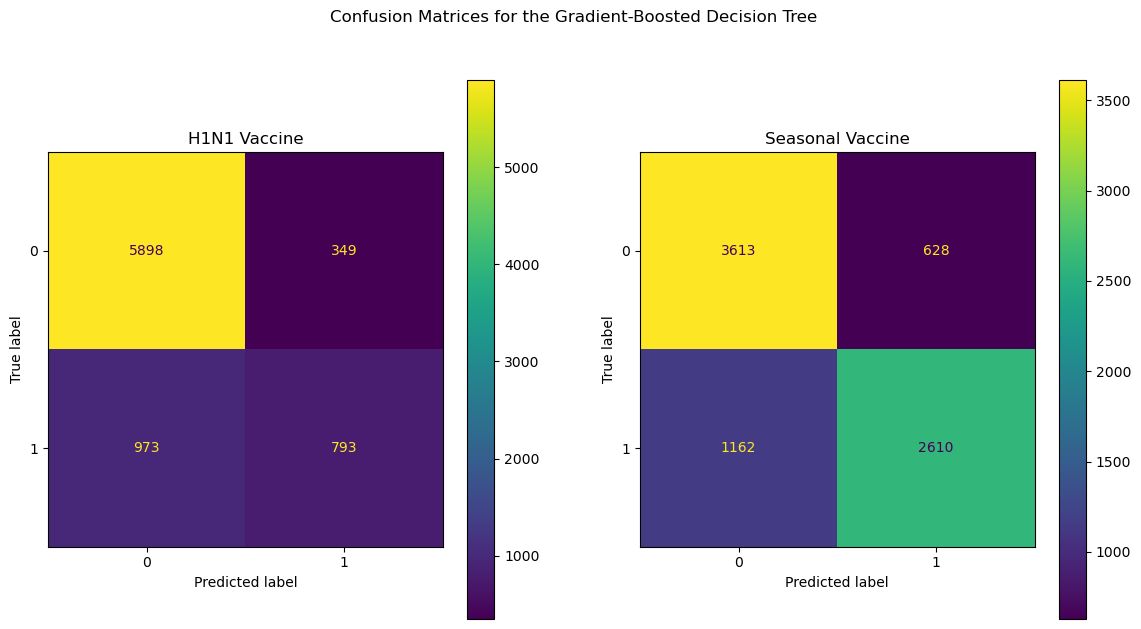

In [225]:
# Display confusion matrices for the model

from sklearn.metrics import ConfusionMatrixDisplay

predictions = xgb_grid.predict(X_test)

fig = plt.figure(figsize=(14, 7))
axs = fig.subplots(1, 2)
for i, col in enumerate(Y_test.columns):
    ConfusionMatrixDisplay.from_predictions(Y_test[col], predictions[:, i], ax=axs[i])
    axs[i].set_title(col.title().replace('_', ' '))
fig.suptitle('Confusion Matrices for the Gradient-Boosted Decision Tree')
plt.show()

We convert all columns with a float dtype into an integer as they all do not lose any value after the decimal, alongside encoding all categorical data into a numeric form.

In [99]:
"""
enc = LabelEncoder()
features[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']] = data[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']].apply(enc.fit_transform)

features[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']]
"""

"\nenc = LabelEncoder()\nfeatures[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']] = data[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']].apply(enc.fit_transform)\n\nfeatures[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']]\n"

In [166]:
features.isnull().sum()/len(features)*100

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex                             0.000000
income_poverty  

In [350]:
#Assigned the columns with categorical data to a variable
categorical_data = ['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']

In [28]:
#Imputing the categorical data with the mode of each column
for column in categorical_data:
    features[column].fillna(features[column].mode()[0], inplace=True)

In [158]:
features.isnull().sum()/len(features)*100

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex                             0.000000
income_poverty  

In [30]:
features["health_insurance"].mean()

0.9349983150484892

In [455]:
def balance(features):
    from collections import Counter
    from numpy import log
    
    n = len(data)
    classes = [(clas,float(count)) for clas,count in Counter(data).items()]
    k = len(classes)
    
    H = -sum([ (count/n) * log((count/n)) for clas,count in classes]) #shannon entropy
    return H/log(k)

We do not remove the outliers as we believe this variable has been misrepresented

In [ ]:
features.astype('int')

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                 1               0                          0   
1                 3               2                          0   
2                 1               1                          0   
3                 1               1                          0   
4                 2               1                          0   
...             ...             ...                        ...   
26702             2               0                          0   
26703             1               2                          0   
26704             2               2                          0   
26705             1               1                          0   
26706             0               0                          0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                         0                     0                      0   
1                         1                     0                      1   
2                         1                     0                      0   
3                         1                     0                      1   
4                         1                     0                      1   
...                     ...                   ...                    ...   
26702                     1                     0                      0   
26703                     1                     0                      1   
26704                     1                     1                      1   
26705                     0                     0                      0   
26706                     1                     0                      0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                                0                        1   
1                                0                        1   
2                                0                        0   
3                                1                        0   
4                                1                        0   
...                            ...                      ...   
26702                            0                        1   
26703                            0                        0   
26704                            1                        0   
26705                            0                        0   
26706                            0                        0   

       behavioral_touch_face  doctor_recc_h1n1  ...  education  race  sex  \
0                          1                 0  ...          1     3    0   
1                          1                 0  ...          0     3    1   
2                          0                 0  ...          2     3    1   
3                          0                 0  ...          0     3    0   
4                          1                 0  ...          3     3    0   
...                      ...               ...  ...        ...   ...  ...   
26702                      0                 0  ...          3     3    0   
26703                      0                 1  ...          2     3    1   
26704                      1                 0  ...          3     3    0   
26705                      1                 0  ...          3     1    0   
26706                      0                 0  ...          3     3    1   

       income_poverty  marital_status  rent_or_own  employment_status  \
0                   2               1            0                  1   
1                   2               1            1                  0   
2                   0               1            0                  0   
3                   2               1            1                  1   
4                   0               0            0                  0   
...               ...             ...          ...                ...   
26702               0               1            0                  1   
26703               0              

We can see that from all behavioral based variables, there is a slight uptrend of positive actions leading to people taking the vaccine.

## Creating the models

### Train/Test Split

In [228]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( features, labels, test_size = 0.25, random_state = 30)

In [229]:
#Driven data function to evaluate model's performance
def plot_roc(y_true, y_score, label_name, ax, color=False):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    if color:
        ax.set_facecolor('lightblue')
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {metrics.roc_auc_score(y_true, y_score):.4f}"
    )

### Naive Bayes

In [230]:
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance

brmodel = BinaryRelevance(GaussianNB())

brmodel.fit(x_train, y_train)

y_prediction_nb = brmodel.predict(x_test)



TypeError: no supported conversion for types: (dtype('O'),)

In [231]:
accuracy_nb = accuracy_score(y_test, y_prediction_nb)
accuracy_nb

NameError: name 'y_prediction_nb' is not defined

### Linear SVC using Multi Output Classifier

The MultiOutputClassifier is convenient since it simplifies the process and you can predict both labels in just one step. 
On the other hand predicting the two labels separately gives you more control and you may be able to fine tune the model for each case or even use two completely different models.

In [232]:

from sklearn.datasets import make_blobs
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

# Create the SVM
svm = LinearSVC(random_state=42)

# Make it an Multilabel classifier
multilabel_classifier = MultiOutputClassifier(svm, n_jobs=-1)

# Fit the data to the Multilabel classifier
multilabel_classifier = multilabel_classifier.fit(x_train, y_train)

# Get predictions for test data
y_test_pred = multilabel_classifier.predict(x_test)

# Generate multiclass confusion matrices
matrices = multilabel_confusion_matrix(y_test, y_test_pred)

# Plotting matrices: code
cmd = ConfusionMatrixDisplay(matrices[0], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 1 (type)')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[1], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 2 (color)')
plt.show()

ValueError: could not convert string to float: '55 - 64 Years'

In [475]:
accuracy_svc = accuracy_score(y_test, y_test_pred)
accuracy_svc

0.6655683690280065

### Random Forest 

In [476]:
random_forest = RandomForestClassifier()

In [477]:
random_forest.fit(x_train, y_train)

y_prediction_rf = random_forest.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_prediction_rf)
accuracy_rf

0.6627227796914782

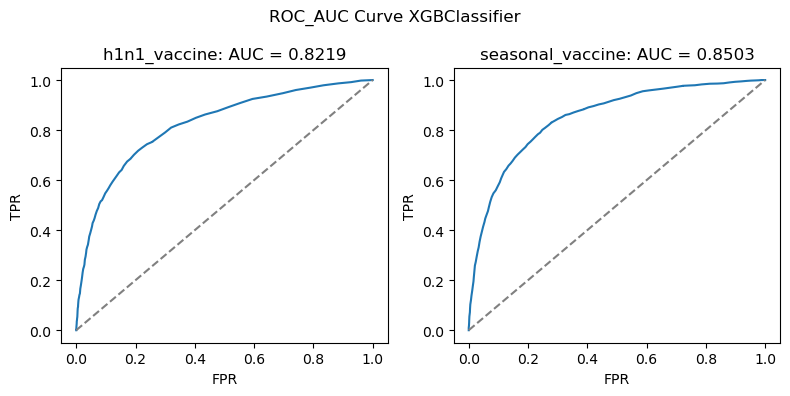

In [478]:
y_preds = random_forest.predict_proba(x_test)
y_preds_both = pd.DataFrame({"h1n1_vaccine":y_preds[0][:, 1], "seasonal_vaccine":y_preds[1][:, 1]}, index=y_test.index)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plt.suptitle(f"ROC_AUC Curve XGBClassifier")

plot_roc(y_test['h1n1_vaccine'], y_preds_both['h1n1_vaccine'], 'h1n1_vaccine',ax=ax[0])
plot_roc(y_test['seasonal_vaccine'], y_preds_both['seasonal_vaccine'], 'seasonal_vaccine',ax=ax[1])
fig.tight_layout()

In [479]:
metrics.roc_auc_score(y_test, y_preds_both)

0.8360860166363179

We use the support vector classicier with a linear kernel

### Multilabel K-Nearest Neighbour

### XGBoost Classifier

In [480]:
import xgboost as xgb

xgb_cl = MultiOutputClassifier(estimator=xgb.XGBClassifier(n_estimators=1000, verbosity=1, n_jobs=-1, learning_rate=0.05))
xgb_cl.fit(x_train, y_train)
preds = xgb_cl.predict(x_test)

In [481]:
y_preds = xgb_cl.predict_proba(x_test)
y_preds_both = pd.DataFrame({"h1n1_vaccine":y_preds[0][:, 1], "seasonal_vaccine":y_preds[1][:, 1]}, index=y_test.index)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plt.suptitle(f"ROC_AUC Curve XGBClassifier")

plot_roc(y_test['h1n1_vaccine'], y_preds_both['h1n1_vaccine'], 'h1n1_vaccine',ax=ax[0])
plot_roc(y_test['seasonal_vaccine'], y_preds_both['seasonal_vaccine'], 'seasonal_vaccine',ax=ax[1])
fig.tight_layout()

In [482]:
metrics.roc_auc_score(y_test, y_preds_both)

0.8368786683051533

## Model Comparison

In [242]:
#SVC_Score = accuracy_svc
#Naive_Bayes_Score = accuracy_nb
#XGBoost_Score = metrics.roc_auc_score(y_test, y_preds_both)
Decision_Tree_Score = xgb_grid.score(X_test, Y_test)
Random_Forest_Score = forest_grid.score(X_test, Y_test)

accuracy_score = [Random_Forest_Score, Decision_Tree_Score]
models = ["Random Forest", "Decision Tree"]

In [248]:
ax = sns.barplot(x=accuracy_score, y=models, color="m")
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.xlabel('Accuracy Score')
plt.title('Model Comparison Chart')
plt.show()

## Submission Dataframe

In [483]:
y_test_h1n1 = y_test.loc[:, ['h1n1_vaccine']]
y_test_seasonal = y_test.loc[:, ["seasonal_vaccine"]]

In [484]:
y_test_h1n1.shape

(6677, 1)

In [485]:
y_pred_h1n1 = y_preds_both.loc[:, 'h1n1_vaccine']
y_pred_seasonal = y_preds_both.loc[:, "seasonal_vaccine"]

In [486]:
target = ["Non-Vaccinated", "Vaccinated"]

H1N1 Vaccines

In [487]:
print(metrics.classification_report(y_test_h1n1.round(), y_pred_h1n1.round(), target_names = target))

                precision    recall  f1-score   support

Non-Vaccinated       0.86      0.94      0.90      5246
    Vaccinated       0.65      0.44      0.52      1431

      accuracy                           0.83      6677
     macro avg       0.75      0.69      0.71      6677
  weighted avg       0.81      0.83      0.82      6677



Seasonal Vaccines

In [488]:
print(metrics.classification_report(y_test_seasonal.round(), y_pred_seasonal.round(), target_names = target))

                precision    recall  f1-score   support

Non-Vaccinated       0.78      0.79      0.79      3552
    Vaccinated       0.76      0.74      0.75      3125

      accuracy                           0.77      6677
     macro avg       0.77      0.77      0.77      6677
  weighted avg       0.77      0.77      0.77      6677



## Submission File

Pre-processing of testing features dataframe

In [374]:
def testing_preprocessing():

    test_features_df = pd.read_csv("test_set_features.csv", index_col="respondent_id")
    test_features_df.tail()
    test_features_df.drop(["health_insurance", "employment_industry", "employment_occupation"], axis = 1, inplace = True)

    numeric_data = test_features_df._get_numeric_data()

    for column in numeric_data:
        test_features_df[column].fillna(test_features_df[column].median(), inplace= True)
        
    #for column in categorical_data:
        #test_features_df[column].fillna(test_features_df[column].mode()[0], inplace=True)

    #test_features_df[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']] = test_features_df[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']].apply(enc.fit_transform)

    #test_features_df[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa']]

    return test_features_df

In [375]:
test_df = testing_preprocessing()

In [378]:
best_model = forest_grid.best_estimator_
best_model.fit(features, labels)

comp_predictions = pd.DataFrame(best_model.predict_proba(test_df), index=test_df.index, columns=labels.columns)

comp_predictions.to_csv('random_forest.csv')

In [379]:
comp_predictions.head(10)

h1n1_vaccine  seasonal_vaccine
respondent_id                                
26707              0.158242          0.230870
26708              0.046331          0.053460
26709              0.448044          0.688296
26710              0.546301          0.949504
26711              0.311588          0.433715
26712              0.558337          0.958190
26713              0.366528          0.405621
26714              0.126041          0.150715
26715              0.047859          0.135575
26716              0.146901          0.767233

In [377]:
test_df.tail()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
53410                   1.0             1.0                        0.0   
53411                   3.0             1.0                        0.0   
53412                   0.0             1.0                        0.0   
53413                   3.0             1.0                        0.0   
53414                   2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
53410                           1.0                   0.0   
53411                           1.0                   0.0   
53412                           0.0                   0.0   
53413                           1.0                   0.0   
53414                           0.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
53410                            1.0                          0.0   
53411                            1.0                          1.0   
53412                            0.0                          0.0   
53413                            1.0                          0.0   
53414                            1.0                          0.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
53410                              0.0                    1.0   
53411                              1.0                    1.0   
53412                              0.0                    0.0   
53413                              1.0                    0.0   
53414                              0.0                    1.0   

               doctor_recc_h1n1  ...   race     sex  \
respondent_id                    ...                  
53410                       1.0  ...  White  Female   
53411                       0.0  ...  White    Male   
53412                       0.0  ...  White  Female   
53413                       0.0  ...  White  Female   
53414                       1.0  ...  White  Female   

                          income_poverty  marital_status  rent_or_own  \
respondent_id                                                           
53410                                NaN             NaN          NaN   
53411                      Below Poverty         Married         Rent   
53412                      Below Poverty     Not Married         Rent   
53413          <= $75,000, Above Poverty         Married          Own   
53414                                NaN     Not Married         Rent   

                employment_status  hhs_geo_region                census_msa  \
respondent_id                                                                 
53410                         NaN        dqpwygqj       MSA, Principle City   
53411                    Employed        qufhixun                   Non-MSA   
53412          Not in Labor Force        qufhixun  MSA, Not Principle  City   
53413          Not in Labor Force        bhuqouqj  MSA, Not Principle  City   
53414                    Employed        lrircsnp       MSA, Principle City   

               household_adults  household_children  
respondent_id                                        
53410                       1.0                 1.0  
53411                       1.0                 3.0  
53412                       1.0                 0.0  
53413                       1.0                 0.0  
53414                       0.0                 0.0  

[5 rows x 32 columns]

In [ ]:
test_df.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           2.0             2.0                        0.0   
1           1.0             1.0                        0.0   
2           2.0             2.0                        0.0   
3           1.0             1.0                        0.0   
4           3.0             1.0                        1.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   1.0                   0.0                    1.0   
1                   0.0                   0.0                    0.0   
2                   0.0                   1.0                    1.0   
3                   0.0                   0.0                    0.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          1.0                      0.0   
1                          0.0                      0.0   
2                          1.0                      1.0   
3                          0.0                      0.0   
4                          1.0                      1.0   

   behavioral_touch_face  doctor_recc_h1n1  ...  education  race  sex  \
0                    1.0               0.0  ...          2     1    0   
1                    0.0               0.0  ...          0     3    1   
2                    1.0               0.0  ...          2     3    1   
3                    0.0               1.0  ...          0     3    0   
4                    1.0               0.0  ...          0     0    0   

   income_poverty  marital_status  rent_or_own  employment_status  census_msa  \
0               1               1            1                  0           0   
1               2               1            1                  0           2   
2               1               0            0                  0           2   
3               0               0            0                  1           0   
4               0               1            0                  0           2   

   household_adults  household_children  
0               1.0                 0.0  
1               3.0                 0.0  
2               1.0                 0.0  
3               1.0                 0.0  
4               0.0                 1.0  

[5 rows x 32 columns]

In [ ]:
scaler = MinMaxScaler()
test_df = scaler.fit_transform(test_df)

In [ ]:
test_probs = regressor.predict(test_df)
test_probs

NameError: name 'regressor' is not defined

In [ ]:
submission_df = pd.read_csv("submission_format.csv", index_col="respondent_id")

In [ ]:
submission_df.head()

respondent_id  h1n1_vaccine  seasonal_vaccine
0          26707           0.5               0.7
1          26708           0.5               0.7
2          26709           0.5               0.7
3          26710           0.5               0.7
4          26711           0.5               0.7

In [ ]:
submission_df["h1n1_vaccine"] = test_probs[0][:, 1]
submission_df["seasonal_vaccine"] = test_probs[1][:, 1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
submission_df.to_csv('my_submission.csv', index=True)
submission_df.head(10)

h1n1_vaccine  seasonal_vaccine
respondent_id                                
26707                   0.5               0.7
26708                   0.5               0.7
26709                   0.5               0.7
26710                   0.5               0.7
26711                   0.5               0.7
26712                   0.5               0.7
26713                   0.5               0.7
26714                   0.5               0.7
26715                   0.5               0.7
26716                   0.5               0.7